In [1]:
#import dependencies 
import random
import copy
from timeit import default_timer as timer
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
# Some classes I wrote to build out the Texas Holdem Game
import TH
plt.style.use('seaborn-white')

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
#functions used

#This displays cards
def display_cards(cards,table_cards):
    '''
    This function takes cards in hand and cards on table and displays them with images
    '''
    player_card1 = mpimg.imread(f'cards/{str(cards[0][0]) + cards[0][1]}.PNG')
    player_card2 = mpimg.imread(f'cards/{str(cards[1][0]) + cards[1][1]}.PNG')
    #### HAND #####
    #card1
    plt.subplot2grid(shape = (6,15),loc = (0,0),rowspan =2,colspan = 3)
    plt.imshow(player_card1)
    plt.xticks([])
    plt.yticks([])
    plt.box(False)

    #card2
    plt.subplot2grid(shape = (6,15),loc = (0,3),rowspan =2,colspan = 3)
    plt.imshow(player_card2)
    plt.xticks([])
    plt.yticks([])
    plt.box(False)
    if len(table[0]) >= 3:
        table1 = mpimg.imread(f'cards/{str(table_cards[0][0][0]) + table_cards[0][0][1]}.PNG')
        table2 = mpimg.imread(f'cards/{str(table_cards[0][1][0]) + table_cards[0][1][1]}.PNG')
        table3 = mpimg.imread(f'cards/{str(table_cards[0][2][0]) + table_cards[0][2][1]}.PNG')
        
        ##### TABLE #####
        #table1
        plt.subplot2grid(shape = (6,15),loc = (2,0),rowspan =2,colspan = 3)
        plt.imshow(table1)
        plt.xticks([])
        plt.yticks([])
        plt.box(False)

        # #table2
        plt.subplot2grid(shape = (6,15),loc = (2,3),rowspan =2,colspan = 3)
        plt.imshow(table2)
        plt.xticks([])
        plt.yticks([])
        plt.box(False)

        # #table3
        plt.subplot2grid(shape = (6,15),loc = (2,6),rowspan =2,colspan = 3)
        plt.imshow(table3)
        plt.xticks([])
        plt.yticks([])
        plt.box(False)
    if len(table[0]) >= 4:
        table4 = mpimg.imread(f'cards/{str(table_cards[0][3][0]) + table_cards[0][3][1]}.PNG')
        ##### TABLE #####
        #table4
        plt.subplot2grid(shape = (6,15),loc = (2,9),rowspan =2,colspan = 3)
        plt.imshow(table4)
        plt.xticks([])
        plt.yticks([])
        plt.box(False)           

#these two functions calculate the probability of hitting each hand
def hand_ranked(hand):
    Texas_Holdem = TH.Table(hand,table,n_players)
    dealt = Texas_Holdem.deal()
    Holdem = TH.Hit_Hand(hand,dealt)
    return {
        'straight_flush' : Holdem.straight_flush(), #straight flush
        'four_of_kind' : Holdem.four_of_kind(),     #four of a kind
        'full_house' : Holdem.full_house(),         #full house
        'flush' : Holdem.flush(),                   #flush
        'straight' : Holdem.straight(),             #straight
        'three_of_kind' : Holdem.three_of_kind(),   #three of a kind
        'two_pair' : Holdem.two_pair(),             #two pair
        'pair' : Holdem.pair()                      #pair
        }


def probabilities(hand, n = 1000):    
    straight_flush = 0
    four_of_kind = 0
    full_house = 0
    flush = 0
    straight = 0
    three_of_kind = 0
    two_pair = 0
    pair = 0
    for i in range(n):        
        sim_hand = hand_ranked(hand)
        
        straight_flush += sim_hand['straight_flush'] #straight flush
        four_of_kind += sim_hand['four_of_kind'] #four of a kind
        full_house += sim_hand['full_house'] #full house
        flush += sim_hand['flush'] #flush
        straight += sim_hand['straight'] #straight
        three_of_kind += sim_hand['three_of_kind'] #three of a kind
        two_pair += sim_hand['two_pair'] #two pair
        pair += sim_hand['pair'] #pair
    return {'Straight Flush': (straight_flush/n)*100,
            'Four of a Kind': (four_of_kind/n)*100,
            'Full House': (full_house/n)*100,
            'Flush': (flush/n)*100,
            'Straight': (straight/n)*100,
            'Three of a Kind': (three_of_kind/n)*100,
            'Two Pair': (two_pair/n)*100,
            'Pair': (pair/n)*100}



#these functions determine the winning hand

#this function returns a "Top Hand" for the given input
def top_hand(hand):
    Texas_Holdem = TH.Table(hand,table,n_players)
    dealt = Texas_Holdem.deal()
    Holdem_hand = TH.Best_Hand(hand,dealt,print_hand = False)
    hands_form =  {
        'straight_flush' : Holdem_hand.straight_flush(), #straight flush
        'four_of_kind' : Holdem_hand.four_of_kind(),     #four of a kind
        'full_house' : Holdem_hand.full_house(),         #full house
        'flush' : Holdem_hand.flush(),                   #flush
        'straight' : Holdem_hand.straight(),             #straight
        'three_of_kind' : Holdem_hand.three_of_kind(),   #three of a kind
        'two_pair' : Holdem_hand.two_pair(),             #two pair
        'pair' : Holdem_hand.pair(),                     #pair
        'high_card': Holdem_hand.high_card()             #high card
    }
    i = 10
    for key, value in hands_form.items():
        i -= 1
        if value != None:
            return [(i,key), value]

#this function compares two hands to see who won

#PROBLEM RIGHT NOW IS IT IS CALLING top_hand() twice so the hand resets
def winner(hand,comparison_hand,print_details = False):
    p1 = top_hand(hand)
    p2 = top_hand(comparison_hand)
    if print_details == True:
        print('Cards on Table:\n', dealt[1], '\n\n')
        print('player 1 hand:', hand)
        print('Player 1:',p1)
        print('player 2 hand:', comparison_hand)
        print('Player 2:',p2)
        print('\n')

    if p1[0][0] > p2[0][0]:
        return True
    elif p1[0][0] == p2[0][0]:
        #compare each card starting at the most important
        for i in range(1,5):
            if p1[1][-i] > p2[1][-i]:
                return True
            elif p1[1][-i] < p2[1][-i]:
                return False   
        #if all cards are equal its a tie and we are calling ties wins because no money is lost in a tie
        return True 
    elif p1[0][0] < p2[0][0]:
        return False
    
#this calls winner as many times as necessary to see who won each hand            
def all_players(hand,other_players_hands):
    beat = []
    for player_hand in other_players_hands:
        beat.append(winner(hand,player_hand))
    return all(beat)
    
#this calculates the probability of winning
def winner_probabilty(hand, n = 1000):
    wins = 0
    for i in range(n):
        wins += all_players(hand,dealt[0])
    return (wins/n)*100
    

#these functions create a hand
def texas_holdem_selector(n_cards_on_table = 3, number_of_players = 5, kind = 'randomized'):
    global Game
    global Cards
    global p1
    global table
    global Texas_Holdem
    global dealt
    global Holdem
    global n_players
    global Holdem_hand
    n_players = number_of_players
    if kind == 'randomized':
        Game = TH.Hand()
        Cards = Game.player_1()
        p1 = Cards
        table = Game.table(cards_on_table = n_cards_on_table)
    elif kind == 'select_hand':
        Game = TH.Hand()
        Cards = Game.hand_selection()
        p1 = Cards
        table = Game.table_selection(cards_on_table = n_cards_on_table)        
    Texas_Holdem = TH.Table(Cards,table,n_players)
    dealt = Texas_Holdem.deal()
#     Holdem = TH.Hit_Hand(Cards,dealt,print_hand = False)
#     Holdem_hand = TH.Best_Hand(Cards,dealt,print_hand = False)  
    
    plt.figure(figsize = (10,10))
    display_cards(Cards,table)

def texas_holdem_selector_list(number_of_players = 5,list_input_hand = [],list_input_table = [], display = False):
    global Game
    global Cards
    global p1
    global table
    global Texas_Holdem
    global dealt
    global Holdem
    global n_players
    cards_on_table = len(list_input_table)
    n_players = number_of_players
    Game = TH.Hand()
    Cards = Game.hand_selection_list(list_input_hand)
    p1 = Cards
    table = Game.table_selection_list(cards_on_table = list_input_table)        
    Texas_Holdem = TH.Table(Cards,table,n_players)
    dealt = Texas_Holdem.deal()
    #Holdem = TH.Hit_Hand(Cards,dealt,print_hand = False)
    if display == True:
        plt.figure(figsize = (10,10))
        display_cards(Cards,table)

#this function allows for iteration over a list input
def list_input_iterator(full_hand,num_simulations = 100000,num_players = 3,display = False,batch = 0.01):
    mean = []
    sd = []
    number_of_hands = len(full_hand)
    x = 0
    for i in range(number_of_hands):
        x += 1
        texas_holdem_selector_list(number_of_players = num_players,list_input_hand = full_hand[i][0],
                                    list_input_table = full_hand[i][1], display = display)
        win_list = []
        for j in range(int(num_simulations*batch)):
            win = winner_probabilty(Cards, n = int(num_simulations/(num_simulations*batch)))
            win_list.append(win)
        y_upper = np.mean(win_list) + np.std(win_list)
        y_lower = np.mean(win_list) - np.std(win_list)
        mean.append(np.mean(win_list))
        sd.append([y_lower,y_upper])
        print(f'{x} of {number_of_hands} complete')
    return [mean, sd]

#this draws a standard deviation line
def std_line(x,y):
    for i in range(len(y)):
        plt.plot([x[i],x[i]],[y[i][0],y[i][1]],'r-')

#### Create the hand
1. The first one will create a randomized hand
2. The second one you select the cards
    - 11 = J
    - 12 = Q
    - 13 = K
    - 14 = A
    - Suits: H = Hearts D = Diamond S = Spades C = clubs
    

Card 1 value:14
Card 1 suit:H
Card 2 value:14
Card 2 suit:D


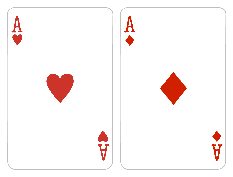

In [24]:
texas_holdem_selector(n_cards_on_table = 0, number_of_players = 2, kind = 'select_hand') #randomized or select_hand

In [25]:
start = timer()
simulated_hands = 100000
probability_of_winning = winner_probabilty(Cards, n = simulated_hands)

end = timer()
print(f'Execution time: {round(end - start,2)}s')
print(probability_of_winning)

start = timer()

prob_of_hitting = probabilities(hand = Cards, n = simulated_hands)

print(f'Your Hand: {p1}\n',
    f'The Table: {table[0]}\n\n',
)

end = timer()
print(f'Execution time: {round(end - start,2)}s')
prob_of_hitting

Execution time: 14.6s
71.934
Your Hand: [(14, 'H'), (14, 'D')]
 The Table: []


Execution time: 5.87s


{'Straight Flush': 0.006,
 'Four of a Kind': 0.8909999999999999,
 'Full House': 8.812000000000001,
 'Flush': 1.978,
 'Straight': 1.264,
 'Three of a Kind': 21.599,
 'Two Pair': 48.906,
 'Pair': 100.0}


## Graphing

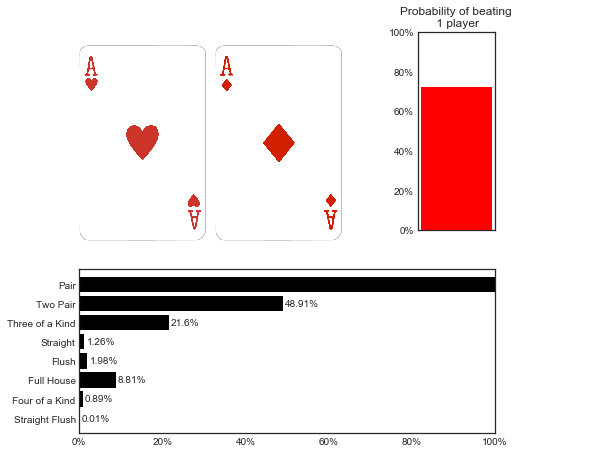

In [26]:
plt.figure(figsize = (12,13))
if len(table[0]) == 0:
    #cards
    plt.subplot2grid(shape = (21,16), loc = (0,0), rowspan = 1, colspan = 1)
    display_cards(Cards,table)

    #hands hit probability
    plt.subplot2grid(shape = (21,16), loc = (7,0), rowspan = 5, colspan = 10)
    x, y = zip(*prob_of_hitting.items())
    plt.barh(x, y, color = 'k')
    plt.title('')
    plt.xlim(0,100)
    plt.xticks(ticks = [0,20,40,60,80,100], labels = ['0%','20%','40%','60%','80%','100%'])
    for i in range(len(y)):
        y_val = round(y[i],2)
        plt.annotate(str(y_val) + '%', xy=(y_val + 0.5,i -0.125))


    #winning probability
    plt.subplot2grid(shape = (21,16),loc = (0,8),rowspan =6,colspan = 2)
    plt.bar(x = 'Winning Probability',height = probability_of_winning,color = 'r')
    plt.xticks([])
    plt.yticks(ticks = [0,20,40,60,80,100], labels = ['0%','20%','40%','60%','80%','100%'])
    plt.ylim(0,100)
    plt.title(f'Probability of beating\n {len(dealt[0])} player')
    plt.annotate(str(probability_of_winning) + '%', xy=(1,probability_of_winning + 2))

    plt.show()
else:
    #cards
    plt.subplot2grid(shape = (21,16), loc = (0,0), rowspan = 1, colspan = 1)
    display_cards(Cards,table)

    #hands hit probability
    plt.subplot2grid(shape = (21,16), loc = (14,0), rowspan = 5, colspan = 12)
    x, y = zip(*prob_of_hitting.items())
    plt.barh(x, y, color = 'k')
    plt.title('')
    plt.xlim(0,100)
    plt.xticks(ticks = [0,20,40,60,80,100], labels = ['0%','20%','40%','60%','80%','100%'])
    for i in range(len(y)):
        y_val = round(y[i],2)
        plt.annotate(str(y_val) + '%', xy=(y_val + 0.5,i -0.125))


    #winning probability
    plt.subplot2grid(shape = (21,16),loc = (0,10),rowspan =13,colspan = 2)
    plt.bar(x = 'Winning Probability',height = probability_of_winning,color = 'r')
    plt.xticks([])
    plt.yticks(ticks = [0,20,40,60,80,100], labels = ['0%','20%','40%','60%','80%','100%'])
    plt.ylim(0,100)
    plt.title(f'Probability of beating\n {len(dealt[0])} player')
    plt.annotate(str(probability_of_winning) + '%', xy=(1,probability_of_winning + 2))

    plt.show()

In [ ]:
pairs_listed = [
    [[(2, 'D'),(2,'H')],[]],
    [[(3, 'D'),(3,'H')],[]],
    [[(4, 'D'),(4,'H')],[]],
    [[(5, 'D'),(5,'H')],[]],
    [[(6, 'D'),(6,'H')],[]],
    [[(7, 'D'),(7,'H')],[]],
    [[(8, 'D'),(8,'H')],[]],
    [[(9, 'D'),(9,'H')],[]],
    [[(10, 'D'),(10,'H')],[]],
    [[(11, 'D'),(11,'H')],[]],
    [[(12, 'D'),(12,'H')],[]],
    [[(13, 'D'),(13,'H')],[]], 
    [[(14, 'D'),(14,'H')],[]]
    ]

start = timer()
pairs_percent = list_input_iterator(pairs_listed,num_simulations = 100000, num_players = 2,display = False, batch = 0.01)
end = timer()
print(f'Execution time: {round(end - start,2)}s')

In [ ]:
plt.figure(figsize = (10,6))
y = pairs_percent[0]
x_range = range(13)
y_lower = [i[0] for i in pairs_percent[1]]
y_upper = [i[1] for i in pairs_percent[1]]
std_line(x_range, pairs_percent[1])
plt.scatter(x_range, y, color = 'k')
plt.plot(
    np.unique(x_range),
    np.poly1d(np.polyfit(x_range, y, 1))(np.unique(x_range)),
    color = 'b'
)
#plt.yticks(ticks = [30,40,50,60,70,80,90], labels = ['30%','40%','50%','60%','70%','80%','90%'])
plt.xticks(ticks = x_range, labels = ["2","3","4","5","6","7","8","9","10","J","Q","K","A"])
ytick_list = list(plt.yticks()[0])
plt.yticks(ticks = ytick_list, labels = [str(round(x,0))[:2] + '%' for x in ytick_list])
print(ytick_list)
#plt.yticks(ticks = [0,20,40,60,80,100], labels = ['0%','20%','40%','60%','80%','100%'])
#plt.tick_params(direction='out', length=6, width=2, colors='k')
plt.title('Probability of Winning with Each Pocket Pair Preflop Head to Head',fontsize = 13)
plt.show()